## Hierarchical clustering.

In [1]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


In this tutorial we will use the same data and some functions from the centroid-models walkthrough

In [2]:
# Generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

In [3]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

___

**Hierarchical clustering** is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or a dendrogram). The root of the tree is the unique cluster that gathers all the samples, with the leaves being the clusters with only one sample.

We will focus on **Agglomerative clustering**. It performs a hierarchical clustering using a bottom-up approach: each observation starts in its own cluster, and the clusters are successively merged together.

In [4]:
# aglomerative clustering 
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

The next step is to create an object from the AgglomerativeClustering class:

In [7]:
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                         linkage='ward',
                         n_clusters = 3)

In the code above, we created an **AgglomerativeClustering** object. We set the Euclidean distance to the **affinity** parameter and set the number of clusters to three. We also set the **linkage** parameter to the **"ward"**. The linkage criteria determine the metric used for the merge strategy:

* **ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and, in this sense, is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

* **maximum** or complete linkage minimizes the maximum distance between observations of pairs of clusters.

* **average** linkage minimizes the average of the distances between all observations of pairs of clusters.

* **single** linkage minimizes the distance between the closest observations of pairs of clusters.

Fit and predict the data:

In [9]:
# fit and predict
y_hc = ac.fit_predict(X)

Plots the results:

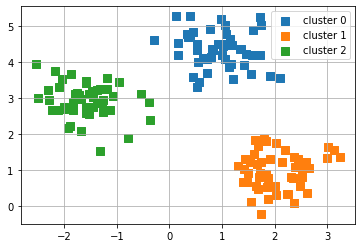

In [10]:
# Plot clustering results
plot_clusters(X,y_hc)

From the plot above, we can see that the **Agglomerative clustering** clustered the data as we expected. There is no difference between **k-means** results from the last tutorial and these results.

### Dendrogran

To identify the right number of clusters we can plot a dendrogram. Let's define the function that plots a dendrogram:

In [15]:
# define plot_dendrogram fucntion
def plot_dendrogram(X,method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title('Dendrogam')
    plt.ylabel('Euclidean distances')
    plt.xlabel('Points')
    plt.show()

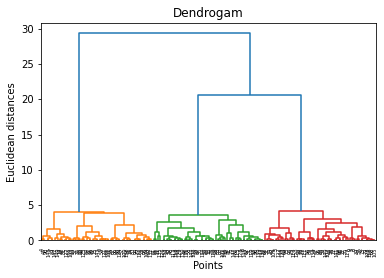

In [16]:
# plot dendrogram
plot_dendrogram(X)